In [3]:
import pandas as pd
import plotly.express as px

In [4]:
df = pd.read_csv(r'C:\Users\aungsawpyae\Documents\data_visualization\datasets\country_wise_latest.csv')

In [8]:
#checking null values
df.isna().sum().reset_index()

,index,0
0,Country/Region,0
1,Confirmed,0
2,Deaths,0
3,Recovered,0
4,Active,0
5,New cases,0
6,New deaths,0
7,New recovered,0
8,Deaths / 100 Cases,0
9,Recovered / 100 Cases,0


### EDA & Visiualization

1. Which countries had the highest number of confirmed cases?

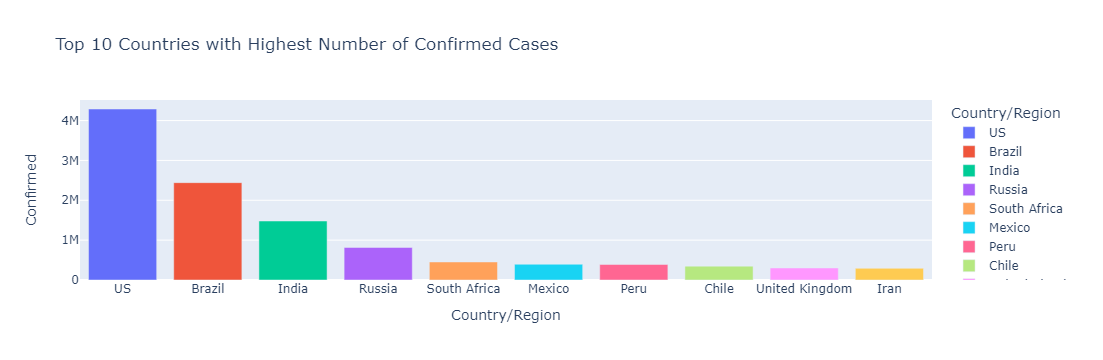

In [16]:
countries_high_cases=df.nlargest(10,'Confirmed')#sort_values('Confirmed',ascending=False)
px.bar(countries_high_cases,
      x='Country/Region',
      y='Confirmed',
      title = 'Top 10 Countries with Highest Number of Confirmed Cases',
      color='Country/Region')

2. What was the distribution of confirmed cases across different WHO Region?

In [18]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

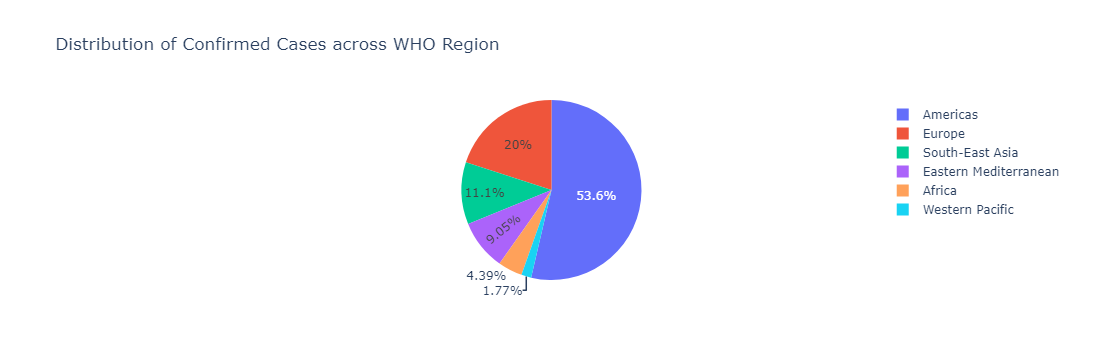

In [19]:
px.pie(df,names='WHO Region',values='Confirmed',title='Distribution of Confirmed Cases across WHO Region')

3. What were the trends in new cases,new deaths and new recoveries in each country?

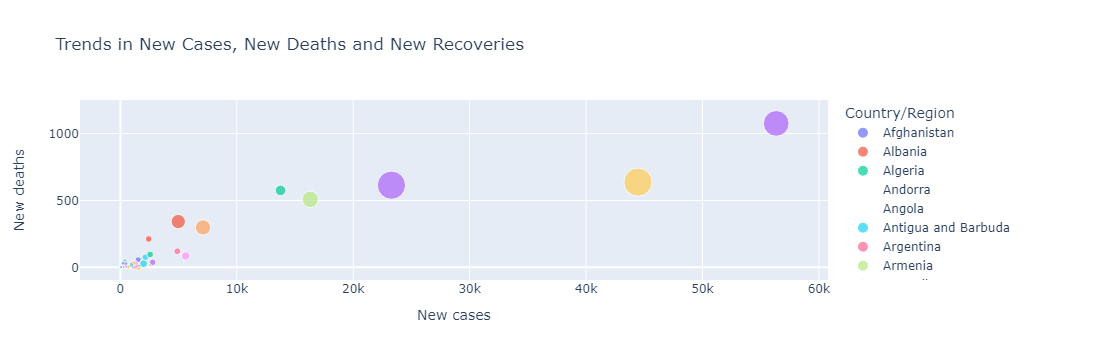

In [23]:
px.scatter(df,
          x='New cases',
          y='New deaths',
          size='New recovered',
          title='Trends in New Cases, New Deaths and New Recoveries',
          color='Country/Region')

4. What was the 1-week percentage increase in confirmed cases for each contry?

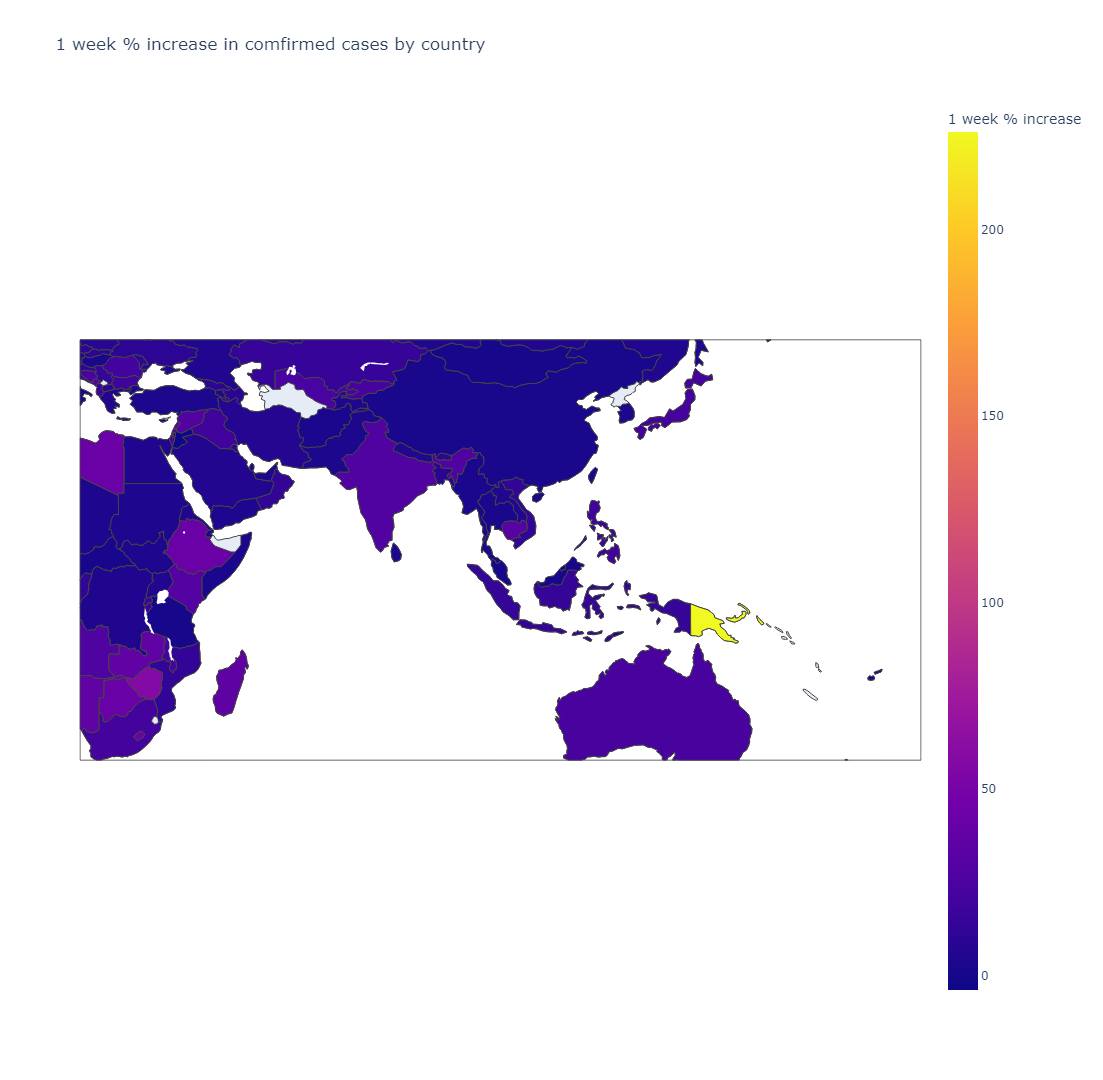

In [30]:
px.choropleth(df,
             locations='Country/Region',
             locationmode='country names',
             color = '1 week % increase',
             hover_name='Country/Region',
             title='1 week % increase in comfirmed cases by country',
             color_continuous_scale=px.colors.sequential.Plasma)

5. How do death rates per 100 confirmed cases vary by WHO region?

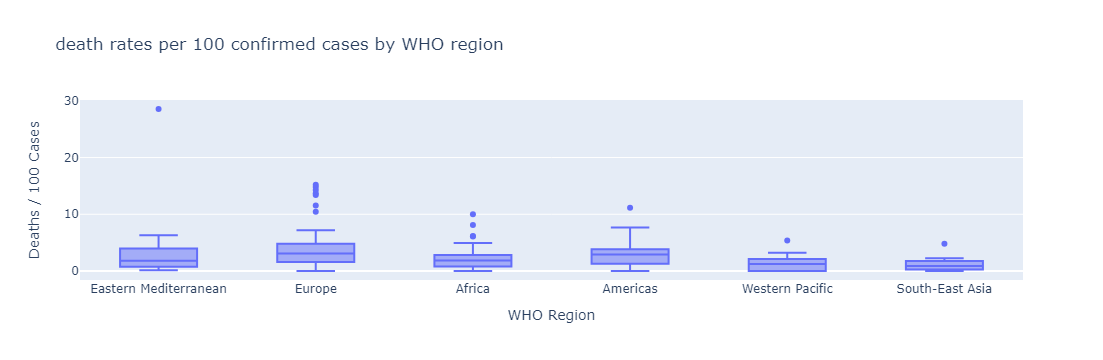

In [32]:
px.box(df,
      x='WHO Region',
      y='Deaths / 100 Cases',
      title='death rates per 100 confirmed cases by WHO region')

6. What was the mortality rate(deaths per 100 confirmed cases) for each country?

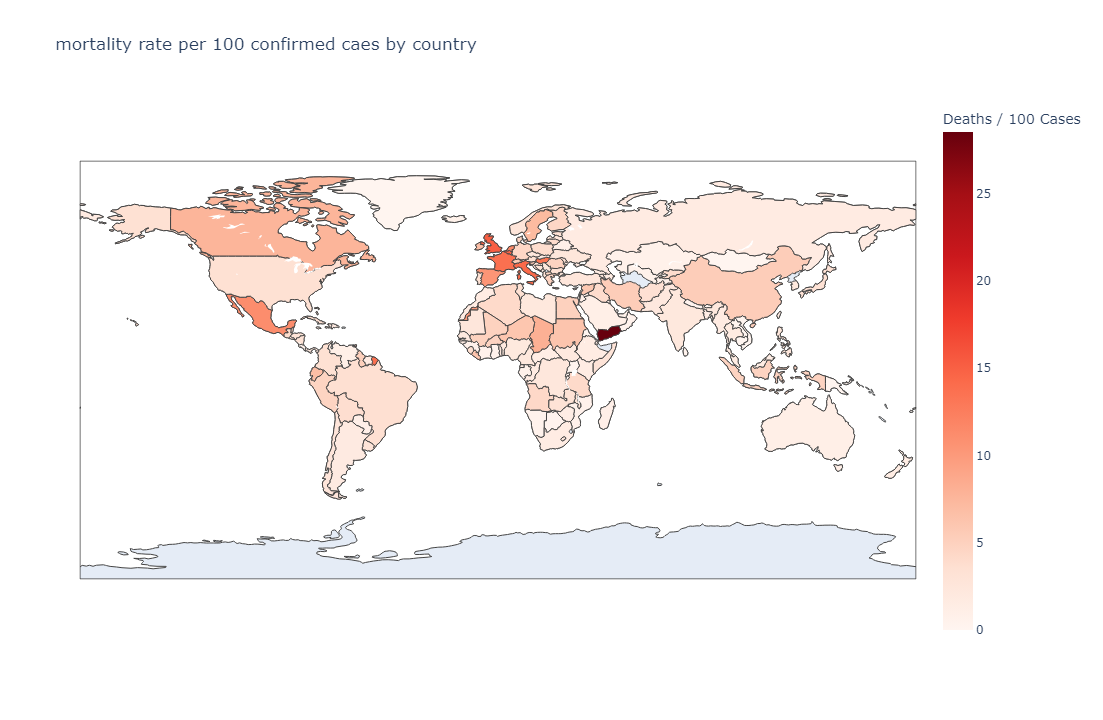

In [42]:
px.choropleth(df,
             locations='Country/Region',
             locationmode='country names',
             color = 'Deaths / 100 Cases',
             hover_name='Country/Region',
             title='mortality rate per 100 confirmed caes by country',
             color_continuous_scale=px.colors.sequential.Reds)

7. How many countries are in each WHO region?

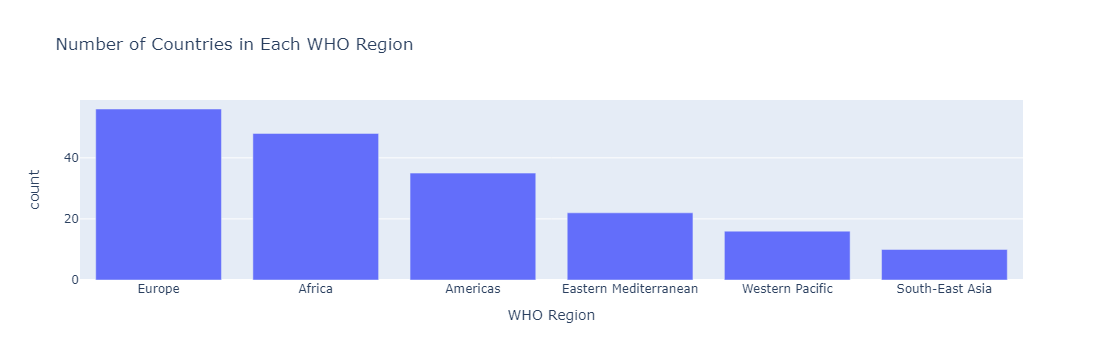

In [40]:
country_by_who = df['WHO Region'].value_counts().reset_index()
px.bar(country_by_who,
      x='WHO Region',
      y='count',
      title='Number of Countries in Each WHO Region')

8. Treemap of confirmed cases by WHO region and country

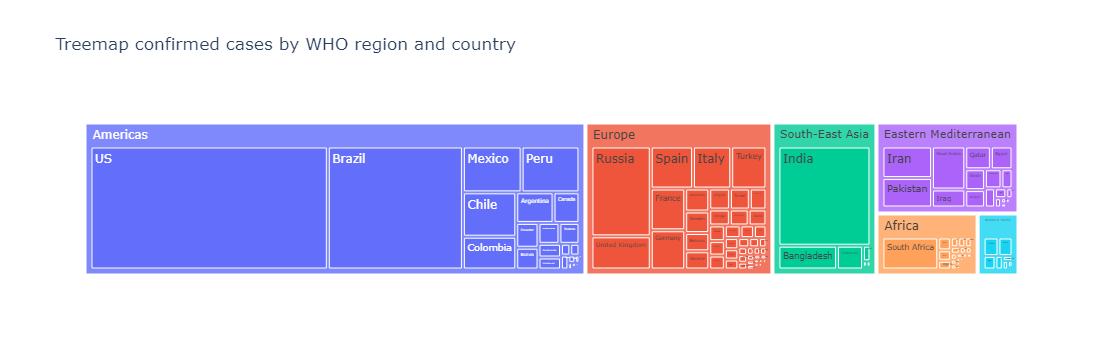

In [41]:
px.treemap(df,
           path=['WHO Region','Country/Region'],
          values='Confirmed',
          title='Treemap confirmed cases by WHO region and country')

In [5]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
